# Experimental Data Analysis of NCAA Basketball Statistics

## Authored By: Brandon Clark and Ben Comer

In [21]:
import matplotlib.pyplot as plt
import importlib
import os
import numpy as np
# some useful mysklearn package import statements and reloads

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.plot_utils
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plot_utils

ncaa_facts = os.path.join("input_data","NCAA_Statistics_Parsed.csv")
ncaa_stats = MyPyTable().load_from_file(ncaa_facts)






## Histograms

1. Scoring Margin Histogram

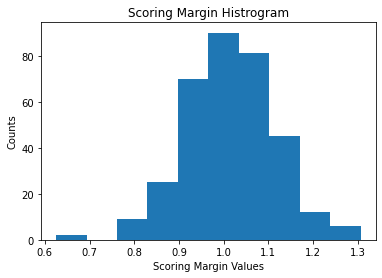

In [22]:
importlib.reload(myutils)
importlib.reload(plot_utils)
scoring_margin = ncaa_stats.get_column("Scoring Margin")
plot_utils.create_histogram("Scoring Margin",scoring_margin)



2. Effective Field Goal Percentage

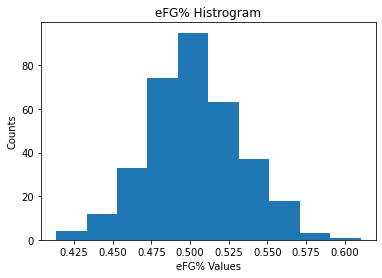

In [23]:
importlib.reload(myutils)
importlib.reload(plot_utils)
efg = ncaa_stats.get_column("eFG%")
plot_utils.create_histogram("eFG%",efg)

3. Steals Per Game + Blocks Per Game

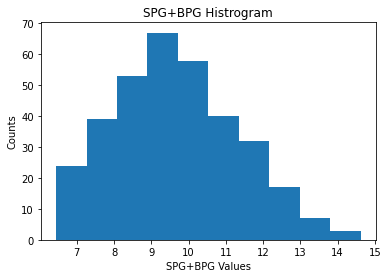

In [24]:
importlib.reload(myutils)
importlib.reload(plot_utils)
spg_bpg = ncaa_stats.get_column("SPG+BPG")
plot_utils.create_histogram("SPG+BPG",spg_bpg)


4. Rebound Margin

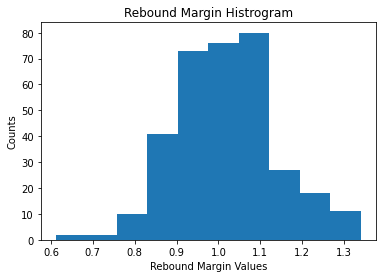

In [25]:
importlib.reload(myutils)
importlib.reload(plot_utils)
rebound_margin = ncaa_stats.get_column("Rebound Margin")
plot_utils.create_histogram("Rebound Margin",rebound_margin)


5. Winning Percentage

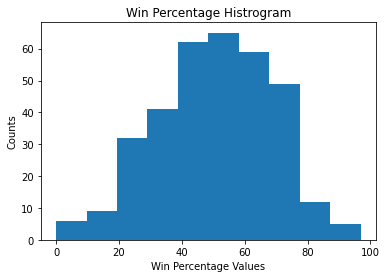

In [26]:
importlib.reload(myutils)
importlib.reload(plot_utils)
win_percentage = ncaa_stats.get_column("Win Percentage")
plot_utils.create_histogram("Win Percentage",win_percentage)

## Scatter Plots

1.

2.

3.

4.